<a href="https://www.kaggle.com/code/pathompongmuangthong/nyc-airbnb-review-analysis?scriptVersionId=114024932" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sb
import re

!pip install -q bloxs
from bloxs import B

import warnings
warnings.filterwarnings("ignore")

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/discovering-new-york-city-through-airbnb-user-re/NYC_2021_airbnb_reviews_data1.csv


# Load data and quick lookup

In [2]:
df = pd.read_csv('/kaggle/input/discovering-new-york-city-through-airbnb-user-re/NYC_2021_airbnb_reviews_data1.csv')

In [3]:
df.head()

,listing_id,url,review_posted_date,review
0,2595,https://www.airbnb.com/rooms/2595,November 2019,"Great location, convenient to everything. Very..."
1,2595,https://www.airbnb.com/rooms/2595,May 2019,Place was so cute and comfy! Host was great an...
2,2595,https://www.airbnb.com/rooms/2595,May 2019,10 / 10 would stay again
3,2595,https://www.airbnb.com/rooms/2595,January 2019,The apartment met expectations to how it was i...
4,2595,https://www.airbnb.com/rooms/2595,December 2018,Great space in a fun old building in NYC. Love...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17444 entries, 0 to 17443
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   listing_id          17444 non-null  int64 
 1   url                 17444 non-null  object
 2   review_posted_date  17444 non-null  object
 3   review              17444 non-null  object
dtypes: int64(1), object(3)
memory usage: 545.2+ KB


In [5]:
df.isna().sum()

listing_id            0
url                   0
review_posted_date    0
review                0
dtype: int64

In [6]:
df['listing_id'].nunique()

219

In [7]:
dfReview = df[['listing_id', 'review']]
dfReview

,listing_id,review
0,2595,"Great location, convenient to everything. Very..."
1,2595,Place was so cute and comfy! Host was great an...
2,2595,10 / 10 would stay again
3,2595,The apartment met expectations to how it was i...
4,2595,Great space in a fun old building in NYC. Love...
...,...,...
17439,1918693,Lovely Brownstone in Brooklyn. Clean and spaci...
17440,1918693,We had a great stay at Lorelei & Alex’s place....
17441,1918693,This was a perfect spot for mine and my partne...
17442,1918693,A lovely spot in a lovely neighborhood. Great ...


# Preprocessing review text

In [8]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from tqdm import tqdm

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
# lower case the text
dfReview['pre_review'] = dfReview['review'].str.lower()

In [10]:
# tokenize the text
dfReview['pre_review'] = dfReview['pre_review'].apply(nltk.word_tokenize)

In [11]:
# remove stop words
stop_words = set(stopwords.words('english'))
dfReview['pre_review'] = dfReview['pre_review'].apply(lambda x: [word for word in x if word not in stop_words])

In [12]:
# stem the words
#stemmer = PorterStemmer()
#dfReview['pre_review'] = dfReview['pre_review'].apply(lambda x: [stemmer.stem(word) for word in x])

In [13]:
dfReview

,listing_id,review,pre_review
0,2595,"Great location, convenient to everything. Very...","[great, location, ,, convenient, everything, ...."
1,2595,Place was so cute and comfy! Host was great an...,"[place, cute, comfy, !, host, great, quick, co..."
2,2595,10 / 10 would stay again,"[10, /, 10, would, stay]"
3,2595,The apartment met expectations to how it was i...,"[apartment, met, expectations, insinuated, ad,..."
4,2595,Great space in a fun old building in NYC. Love...,"[great, space, fun, old, building, nyc, ., lov..."
...,...,...,...
17439,1918693,Lovely Brownstone in Brooklyn. Clean and spaci...,"[lovely, brownstone, brooklyn, ., clean, spaci..."
17440,1918693,We had a great stay at Lorelei & Alex’s place....,"[great, stay, lorelei, &, alex, ’, place, ., l..."
17441,1918693,This was a perfect spot for mine and my partne...,"[perfect, spot, mine, partner, ’, 6-night, sta..."
17442,1918693,A lovely spot in a lovely neighborhood. Great ...,"[lovely, spot, lovely, neighborhood, ., great,..."


# Overall WordCloud

In [14]:
from wordcloud import WordCloud

In [15]:
# concatenate the texts in the 'pre_review' column into a single string
text = ' '.join([' '.join(row) for row in dfReview['pre_review']])

In [16]:
# create the word cloud
wordcloud = WordCloud(background_color='white', max_font_size = 80, max_words = 100, collocations = False).generate(text)

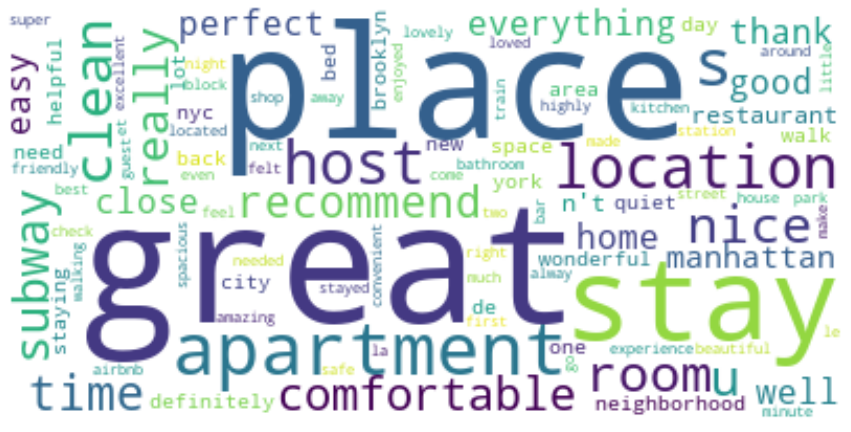

In [17]:
# show the word cloud
plt.figure(figsize=(15, 15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Sentiment Analysis with NLTK Library

In [18]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [19]:
# create the sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

In [20]:
pd.DataFrame({'Text': ['This is a test sentence with a positive sentiment.', 'This is a test sentence with a negative sentiment.']})

,Text
0,This is a test sentence with a positive sentim...
1,This is a test sentence with a negative sentim...


In [21]:
# analyze sentiment in every review texts ('pre_review' column)
dfReview['sentiment'] = dfReview['pre_review'].apply(lambda x: analyzer.polarity_scores(' '.join(x))['compound'])

In [22]:
dfReview

,listing_id,review,pre_review,sentiment
0,2595,"Great location, convenient to everything. Very...","[great, location, ,, convenient, everything, ....",0.7506
1,2595,Place was so cute and comfy! Host was great an...,"[place, cute, comfy, !, host, great, quick, co...",0.9484
2,2595,10 / 10 would stay again,"[10, /, 10, would, stay]",0.0000
3,2595,The apartment met expectations to how it was i...,"[apartment, met, expectations, insinuated, ad,...",0.7076
4,2595,Great space in a fun old building in NYC. Love...,"[great, space, fun, old, building, nyc, ., lov...",0.9062
...,...,...,...,...
17439,1918693,Lovely Brownstone in Brooklyn. Clean and spaci...,"[lovely, brownstone, brooklyn, ., clean, spaci...",0.9477
17440,1918693,We had a great stay at Lorelei & Alex’s place....,"[great, stay, lorelei, &, alex, ’, place, ., l...",0.9590
17441,1918693,This was a perfect spot for mine and my partne...,"[perfect, spot, mine, partner, ’, 6-night, sta...",0.8883
17442,1918693,A lovely spot in a lovely neighborhood. Great ...,"[lovely, spot, lovely, neighborhood, ., great,...",0.9184


In [23]:
# calculate mean of the review sentiments in each listing
dfReview_avg = dfReview.groupby('listing_id')['sentiment'].mean().reset_index(name='avg_sentiment')

In [24]:
# calculate review counts for each listing
dfReview_cnt = dfReview.groupby('listing_id').size().reset_index(name='review_cnt')

In [25]:
# merge two dataframes by 'listing_id'
dfReview_summary = dfReview_avg.merge(dfReview_cnt, on='listing_id')

In [26]:
dfReview_summary

,listing_id,avg_sentiment,review_cnt
0,2595,0.802662,48
1,5121,0.902532,50
2,5178,0.757729,231
3,5203,0.914725,118
4,5803,0.873470,206
...,...,...,...
214,1910270,0.893314,7
215,1913540,0.968050,2
216,1914185,0.780277,22
217,1914231,0.793389,28


# Overall Review Sentiments
Most people love Airbnb listing in NYC!

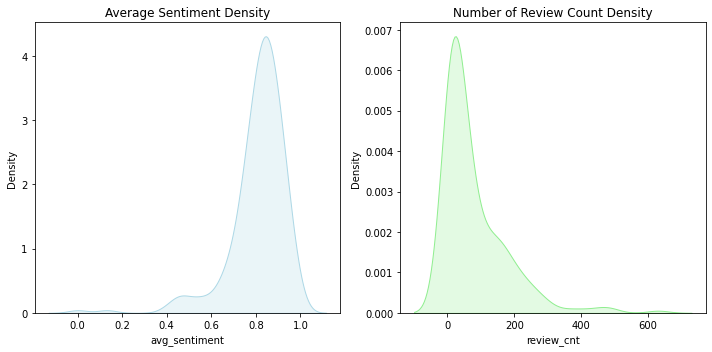

In [27]:
# plot a histogram using 'sum_sentiment' and 'review_cnt' columns
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
sb.kdeplot(dfReview_summary['avg_sentiment'], color='lightblue', shade=True, ax=ax1)
sb.kdeplot(dfReview_summary['review_cnt'], color='lightgreen', shade=True, ax=ax2)
ax1.set(title='Average Sentiment Density')
ax2.set(title='Number of Review Count Density')
fig.tight_layout()
plt.show()

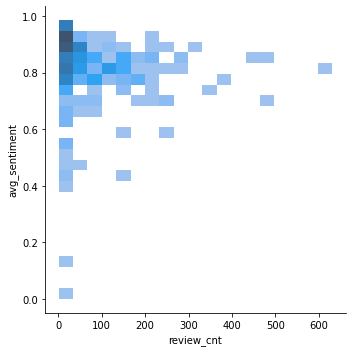

In [28]:
sb.displot(dfReview_summary, x='review_cnt', y='avg_sentiment')
plt.show()

# Top 50 Best AirBnb Listings in NYC
## Sorted by average review sentiment (*only listings with >= 10 review counts)

In [29]:
n = 50
rev_cnt = 10

dfTopN = dfReview_summary.loc[dfReview_summary['review_cnt'] >= rev_cnt]\
.sort_values(by='avg_sentiment', ascending=False)\
.head(n)

In [30]:
# create top n text reviews for wordcloud
text = ''
for listing_id in dfTopN.listing_id:
    review_token = dfReview.loc[dfReview['listing_id'] == listing_id]['pre_review']
    text = ' '.join([' '.join(row) for row in review_token])

In [31]:
# create the top n listing word cloud
wordcloud_topN = WordCloud(background_color='white', max_font_size = 80, max_words = 1000, collocations = False).generate(text)

## What customers are talking about these top 50 best listings in NYC
**Customers are talking about..**
* location/place
* restaurant/train
* apartment/clean
* host/friendly

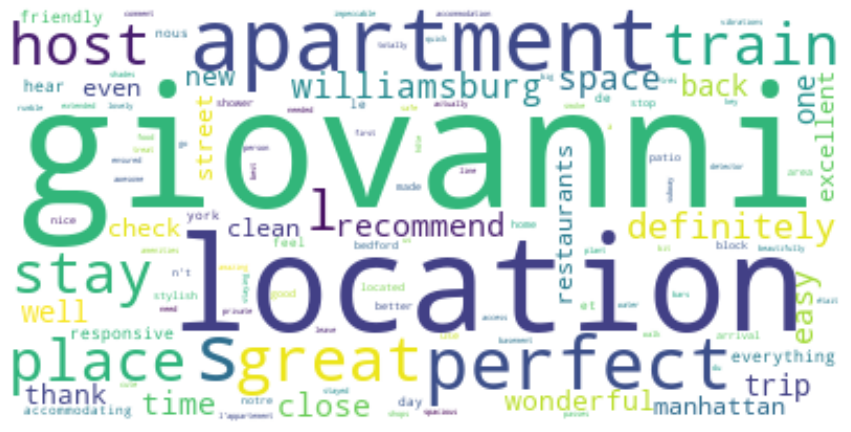

In [32]:
# show the top n word cloud
plt.figure(figsize=(15, 15))
plt.imshow(wordcloud_topN, interpolation='bilinear')
plt.axis("off")
plt.show()

## These are the most number of customer's reviews in the top 50 best listing.

In [33]:
dfTopN.sort_values(by='review_cnt', ascending=False).head(5)

,listing_id,avg_sentiment,review_cnt
55,107630,0.872340,305
8,7097,0.863060,289
6,6990,0.879465,237
4,5803,0.873470,206
37,18728,0.915712,204


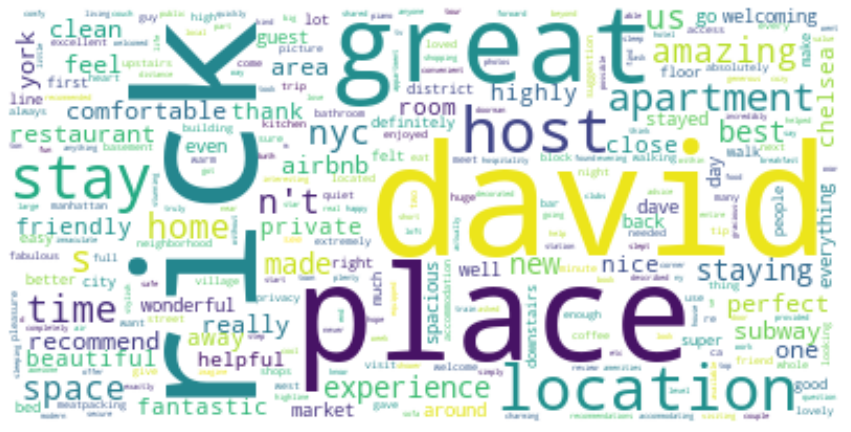

In [34]:
# create top n text reviews for wordcloud
text = ''
for listing_id in dfTopN.sort_values(by='review_cnt', ascending=False).head(5).listing_id:
    review_token = dfReview.loc[dfReview['listing_id'] == listing_id]['pre_review']
    text = ' '.join([' '.join(row) for row in review_token])

# create the top n listing word cloud
wordcloud_topN = WordCloud(background_color='white', max_font_size = 80, max_words = 1000, collocations = False).generate(text)

# show the top n word cloud
plt.figure(figsize=(15, 15))
plt.imshow(wordcloud_topN, interpolation='bilinear')
plt.axis("off")
plt.show()

# Summary
Most listings in NYC have positive customer's reviews

Yup! customers do talking about 
* their nice and friendly host, 
* good location, 
* good neighbors and
* how clean and comfortable place/apartment their stay.

# Review Examples

In [35]:
B([
    B('🏙🌆🌇', dfReview['review'].at[8953], progress=98, color='green'),
    B('🧔‍♂️💖✨', dfReview['review'].at[14259], progress=96.99, color='green'),
    B('🏠🛌🚿', dfReview['review'].at[10212], progress=98.45, color='green')
])